
# Exercises
The end result of this exercise should be a file named `prepare.py`.

**Using your store items data:**


In [1]:
import pandas as pd
from datetime import timedelta, datetime
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

import warnings
warnings.filterwarnings("ignore")

from acquire import get_store_data

# plotting defaults
plt.rc('figure', figsize=(13, 7))
plt.style.use('seaborn-whitegrid')
plt.rc('font', size=16)

In [2]:
df = get_store_data()
df.head(3)

Data is cached. Reading from .csv files
Items data acquired...
Stores data acquired...
Sales data acquired...
Acquisition complete


,Unnamed: 0_x,sale_amount,sale_date,sale_id,Unnamed: 0_y,item_brand,item_id,item_name,item_price,item_upc12,item_upc14,Unnamed: 0,store_address,store_city,store_id,store_state,store_zipcode
0,0,13.0,"Tue, 01 Jan 2013 00:00:00 GMT",1,0,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013,0,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253
1,1,11.0,"Wed, 02 Jan 2013 00:00:00 GMT",2,0,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013,0,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253
2,2,14.0,"Thu, 03 Jan 2013 00:00:00 GMT",3,0,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013,0,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253


1. Convert date column to datetime format.


In [3]:
# Reassign the sale_date column to be a datetime type
df.sale_date = pd.to_datetime(df.sale_date)

# Sort rows by the date and then set the index as that date
df = df.set_index("sale_date").sort_index()

2. Plot the distribution of sale_amount and item_price.


In [4]:
df.head()

,Unnamed: 0_x,sale_amount,sale_id,Unnamed: 0_y,item_brand,item_id,item_name,item_price,item_upc12,item_upc14,Unnamed: 0,store_address,store_city,store_id,store_state,store_zipcode
sale_date,,,,,,,,,,,,,,,,
2013-01-01 00:00:00+00:00,0,13.0,1,0,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013,0,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253
2013-01-01 00:00:00+00:00,211816,26.0,211817,11,Mueller,12,Mueller Sport Care Basic Support Level Medium Elastic Knee Support,8.40,74676640211,74676640211,6,12018 Perrin Beitel Rd,San Antonio,7,TX,78217
2013-01-01 00:00:00+00:00,832656,27.0,832657,45,Mama Marys,46,Pizza Sauce,4.65,35457770664,35457770664,6,12018 Perrin Beitel Rd,San Antonio,7,TX,78217
2013-01-01 00:00:00+00:00,213642,54.0,213643,11,Mueller,12,Mueller Sport Care Basic Support Level Medium Elastic Knee Support,8.40,74676640211,74676640211,7,15000 San Pedro Ave,San Antonio,8,TX,78232
2013-01-01 00:00:00+00:00,215468,35.0,215469,11,Mueller,12,Mueller Sport Care Basic Support Level Medium Elastic Knee Support,8.40,74676640211,74676640211,8,735 SW Military Dr,San Antonio,9,TX,78221


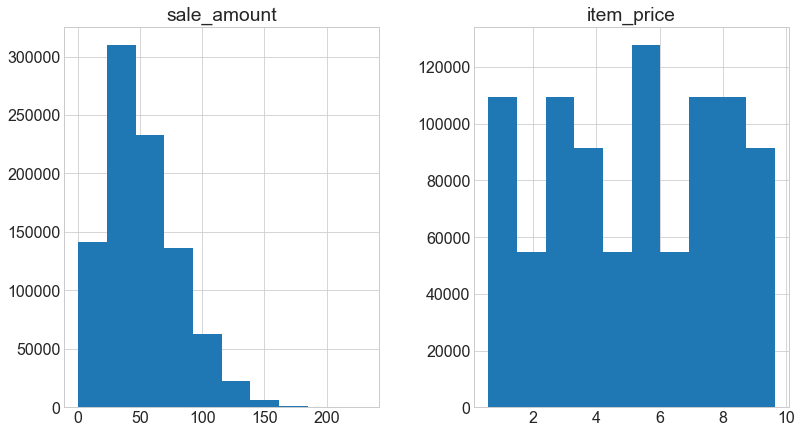

In [7]:
#sns.displot(data=df, x='sale_amount')
df[['sale_amount', 'item_price']].hist();

In [9]:
#sns.displot(data=df, x='item_price')

3. Set the index to be the datetime variable.


In [ ]:
#Completed above

4. Add a 'month' and 'day of week' column to your dataframe.


In [12]:
df['month'] = df.index.month
df['weekday'] = df.index.day_name()


In [13]:
df.sample(10)

,Unnamed: 0_x,sale_amount,sale_id,Unnamed: 0_y,item_brand,item_id,item_name,item_price,item_upc12,item_upc14,Unnamed: 0,store_address,store_city,store_id,store_state,store_zipcode,month,weekday
sale_date,,,,,,,,,,,,,,,,,,
2017-11-11 00:00:00+00:00,83945,20.0,83946,4,Back To Nature,5,Back To Nature Gluten Free White Cheddar Rice Thin Crackers,2.61,759283100036,759283100036,5,1015 S WW White Rd,San Antonio,6,TX,78220,11,Saturday
2014-06-01 00:00:00+00:00,119206,66.0,119207,6,Twinings Of London,7,Twinings Of London Classics Lady Grey Tea - 20 Ct,9.64,70177154004,70177154004,5,1015 S WW White Rd,San Antonio,6,TX,78220,6,Sunday
2017-06-23 00:00:00+00:00,604214,26.0,604215,33,Halls,34,Halls Menthol Cough Suppresant/oral Anesthetic Drops Honey-lemon - 30 Ct,4.17,312546628694,312546628694,0,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,6,Friday
2015-04-28 00:00:00+00:00,630817,55.0,630818,34,Natures Way,35,Natures Way Forskohlii - 60 Ct,5.19,33674100066,33674100066,5,1015 S WW White Rd,San Antonio,6,TX,78220,4,Tuesday
2013-11-17 00:00:00+00:00,738024,14.0,738025,40,P.f. Changs,41,P.f. Changs Home Menu Meal For Two Beef With Broccoli,5.62,31000670016,31000670016,4,1520 Austin Hwy,San Antonio,5,TX,78218,11,Sunday
2014-05-30 00:00:00+00:00,478926,26.0,478927,26,Morton,27,Morton Kosher Salt Coarse,6.01,24600017008,24600017008,2,2118 Fredericksburg Rdj,San Antonio,3,TX,78201,5,Friday
2015-04-13 00:00:00+00:00,451854,88.0,451855,24,Hood,25,Hood Latte Iced Coffee Drink Vanilla Latte,2.43,44100117428,44100117428,7,15000 San Pedro Ave,San Antonio,8,TX,78232,4,Monday
2014-09-11 00:00:00+00:00,320168,65.0,320169,17,Scotch,18,Scotch Removable Clear Mounting Squares - 35 Ct,4.39,21200725340,21200725340,5,1015 S WW White Rd,San Antonio,6,TX,78220,9,Thursday
2013-12-14 00:00:00+00:00,400241,61.0,400242,21,Betty Crocker,22,Betty Crocker Twin Pack Real Potatoes Scalloped 2 Pouches For 2 Meals - 2 Pk,7.31,16000288829,16000288829,9,8503 NW Military Hwy,San Antonio,10,TX,78231,12,Saturday


5. Add a column to your dataframe, sales_total, which is a derived from sale_amount (total items) and item_price.


In [14]:
df['sales_total']=df.sale_amount * df.item_price
df.sample(10)

NumExpr defaulting to 8 threads.


,Unnamed: 0_x,sale_amount,sale_id,Unnamed: 0_y,item_brand,item_id,item_name,item_price,item_upc12,item_upc14,Unnamed: 0,store_address,store_city,store_id,store_state,store_zipcode,month,weekday,sales_total
sale_date,,,,,,,,,,,,,,,,,,,
2014-02-09 00:00:00+00:00,71618,25.0,71619,3,Boars Head,4,Boars Head Sliced White American Cheese - 120 Ct,3.14,208528800007,208528800007,9,8503 NW Military Hwy,San Antonio,10,TX,78231,2,Sunday,78.50
2013-03-18 00:00:00+00:00,471184,32.0,471185,25,Triaminic,26,Triaminic Syrup Night Time Cold & Cough Grape 4oz,0.98,300436344045,300436344045,8,735 SW Military Dr,San Antonio,9,TX,78221,3,Monday,31.36
2017-11-27 00:00:00+00:00,516723,78.0,516724,28,Heinz,29,Heinz Tomato Ketchup - 2 Ct,8.65,13000001038,13000001038,2,2118 Fredericksburg Rdj,San Antonio,3,TX,78201,11,Monday,674.70
2013-11-11 00:00:00+00:00,648544,36.0,648545,35,Deerfields Gluten Free,36,Rice Bran Gluten Free Dinner Rolls Plain,7.95,610358991525,610358991525,5,1015 S WW White Rd,San Antonio,6,TX,78220,11,Monday,286.20
2013-08-12 00:00:00+00:00,849313,10.0,849314,46,Bear Naked,47,Bear Naked Fit Almond Crisp 100 Percent Natural Energy Cereal,7.38,884623708976,884623708976,5,1015 S WW White Rd,San Antonio,6,TX,78220,8,Monday,73.80
2014-06-15 00:00:00+00:00,520940,73.0,520941,28,Heinz,29,Heinz Tomato Ketchup - 2 Ct,8.65,13000001038,13000001038,5,1015 S WW White Rd,San Antonio,6,TX,78220,6,Sunday,631.45
2014-07-08 00:00:00+00:00,626871,85.0,626872,34,Natures Way,35,Natures Way Forskohlii - 60 Ct,5.19,33674100066,33674100066,3,516 S Flores St,San Antonio,4,TX,78204,7,Tuesday,441.15
2017-10-04 00:00:00+00:00,45561,33.0,45562,2,Earths Best,3,Earths Best Organic Fruit Yogurt Smoothie Mixed Berry,2.43,23923330139,23923330139,4,1520 Austin Hwy,San Antonio,5,TX,78218,10,Wednesday,80.19
2013-10-03 00:00:00+00:00,758065,37.0,758066,41,Moms Best Naturals,42,Moms Best Naturals Cereal Toasted Cinnamon Squares,2.97,883978129115,883978129115,5,1015 S WW White Rd,San Antonio,6,TX,78220,10,Thursday,109.89


6. Make sure all the work that you have done above is reproducible. That is, you should put the code above into separate functions and be able to re-run the functions and get the same results.


In [17]:
def prepare():
    df = get_store_data()
    print('Data acquired...')
    print('Converting to datetime')
    df.sale_date = pd.to_datetime(df.sale_date)
    df = df.set_index("sale_date").sort_index()
    print('Sale date set to datetime and reindexed...')
    df['month'] = df.index.month
    df['weekday'] = df.index.day_name()
    df['sales_total']=df.sale_amount * df.item_price
    print('Added engineered columns...')
    print('Prepare complete')
    return df

In [16]:
df2=prepare()

Data is cached. Reading from .csv files
Items data acquired...
Stores data acquired...
Sales data acquired...
Acquisition complete
Data acquired...
Sale date set to datetime and reindexed...
Added engineered columns...


In [19]:
df2.sample(10)

,Unnamed: 0_x,sale_amount,sale_id,Unnamed: 0_y,item_brand,item_id,item_name,item_price,item_upc12,item_upc14,Unnamed: 0,store_address,store_city,store_id,store_state,store_zipcode,month,weekday,sales_total
sale_date,,,,,,,,,,,,,,,,,,,
2014-07-24 00:00:00+00:00,90043,14.0,90044,4,Back To Nature,5,Back To Nature Gluten Free White Cheddar Rice Thin Crackers,2.61,759283100036,759283100036,9,8503 NW Military Hwy,San Antonio,10,TX,78231,7,Thursday,36.54
2014-04-11 00:00:00+00:00,206803,62.0,206804,11,Mueller,12,Mueller Sport Care Basic Support Level Medium Elastic Knee Support,8.40,74676640211,74676640211,3,516 S Flores St,San Antonio,4,TX,78204,4,Friday,520.80
2015-04-18 00:00:00+00:00,544985,56.0,544986,29,Petmate,30,Petmate Booda Bones Steak Bacon & Chicken Flavors - 9 Ct,8.39,723503568678,723503568678,8,735 SW Military Dr,San Antonio,9,TX,78221,4,Saturday,469.84
2016-03-10 00:00:00+00:00,908686,89.0,908687,49,Choice,50,Choice Organic Teas Black Tea Classic Black - 16 Ct,5.20,47445919221,47445919221,7,15000 San Pedro Ave,San Antonio,8,TX,78232,3,Thursday,462.80
2016-01-11 00:00:00+00:00,46755,13.0,46756,2,Earths Best,3,Earths Best Organic Fruit Yogurt Smoothie Mixed Berry,2.43,23923330139,23923330139,5,1015 S WW White Rd,San Antonio,6,TX,78220,1,Monday,31.59
2016-08-07 00:00:00+00:00,413990,20.0,413991,22,Reese,23,Reese Mandarin Oranges Segments In Light Syrup,1.78,70670009658,70670009658,6,12018 Perrin Beitel Rd,San Antonio,7,TX,78217,8,Sunday,35.60
2016-02-26 00:00:00+00:00,8455,13.0,8456,0,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013,4,1520 Austin Hwy,San Antonio,5,TX,78218,2,Friday,10.92
2016-01-03 00:00:00+00:00,85093,10.0,85094,4,Back To Nature,5,Back To Nature Gluten Free White Cheddar Rice Thin Crackers,2.61,759283100036,759283100036,6,12018 Perrin Beitel Rd,San Antonio,7,TX,78217,1,Sunday,26.10
2016-03-05 00:00:00+00:00,512439,57.0,512440,28,Heinz,29,Heinz Tomato Ketchup - 2 Ct,8.65,13000001038,13000001038,0,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,3,Saturday,493.05


---


**Using the OPS data acquired in the Acquire exercises opsd_germany_daily.csv, complete the following:**


In [34]:
df = pd.read_csv("https://raw.githubusercontent.com/jenfly/opsd/master/opsd_germany_daily.csv")
df.head()

,Date,Consumption,Wind,Solar,Wind+Solar
0,2006-01-01,1069.184,NaN,NaN,NaN
1,2006-01-02,1380.521,NaN,NaN,NaN
2,2006-01-03,1442.533,NaN,NaN,NaN
3,2006-01-04,1457.217,NaN,NaN,NaN
4,2006-01-05,1477.131,NaN,NaN,NaN


In [35]:
df.dtypes

Date            object
Consumption    float64
Wind           float64
Solar          float64
Wind+Solar     float64
dtype: object

1. Convert date column to datetime format.


In [36]:
# Reassign the sale_date column to be a datetime type
df.Date = pd.to_datetime(df.Date)

# Sort rows by the date and then set the index as that date
df = df.set_index("Date").sort_index()

df.head()

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2006-01-01,1069.184,NaN,NaN,NaN
2006-01-02,1380.521,NaN,NaN,NaN
2006-01-03,1442.533,NaN,NaN,NaN
2006-01-04,1457.217,NaN,NaN,NaN
2006-01-05,1477.131,NaN,NaN,NaN


In [37]:
df.dtypes

Consumption    float64
Wind           float64
Solar          float64
Wind+Solar     float64
dtype: object

2. Plot the distribution of each of your variables.


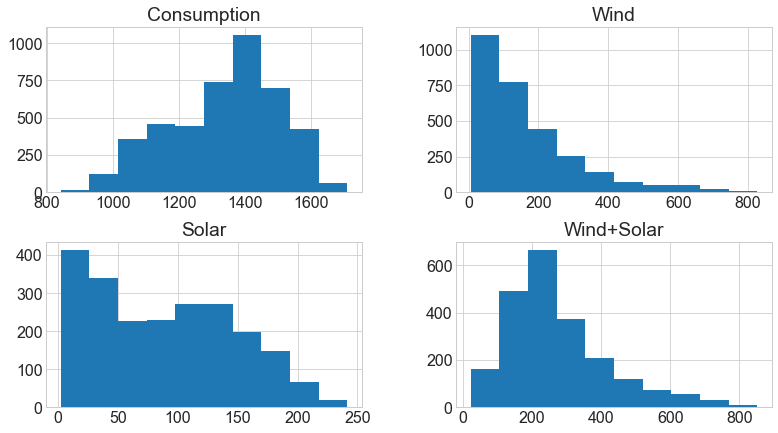

In [25]:
df[['Consumption', 'Wind', 'Solar', 'Wind+Solar']].hist();

3. Set the index to be the datetime variable.


In [38]:
# Completed above

4. Add a month and a year column to your dataframe.


In [39]:
df['month'] = df.index.month
df['year'] = df.index.year


In [40]:
df.sample(10)

,Consumption,Wind,Solar,Wind+Solar,month,year
Date,,,,,,
2011-08-01,1259.474,15.270,NaN,NaN,8,2011
2011-07-22,1307.515,284.356,NaN,NaN,7,2011
2006-07-27,1348.649,NaN,NaN,NaN,7,2006
2011-04-16,1209.070,17.877,NaN,NaN,4,2011
2011-01-26,1568.568,51.444,NaN,NaN,1,2011
2009-03-06,1401.981,NaN,NaN,NaN,3,2009
2013-06-12,1298.307,73.270,154.902,228.172,6,2013
2010-02-21,1189.077,86.668,NaN,NaN,2,2010
2014-03-15,1303.214,510.579,46.959,557.538,3,2014


5. Fill any missing values.


In [41]:
df.isnull().sum() # number null values in each column

Consumption       0
Wind           1463
Solar          2195
Wind+Solar     2196
month             0
year              0
dtype: int64

In [42]:
df.head()

,Consumption,Wind,Solar,Wind+Solar,month,year
Date,,,,,,
2006-01-01,1069.184,NaN,NaN,NaN,1,2006
2006-01-02,1380.521,NaN,NaN,NaN,1,2006
2006-01-03,1442.533,NaN,NaN,NaN,1,2006
2006-01-04,1457.217,NaN,NaN,NaN,1,2006
2006-01-05,1477.131,NaN,NaN,NaN,1,2006


Figure out what NA really means in this context. If it is blank because there wasn't power generated with that method that day, consider using fill 0 instead of the forward/backfill approach taken below

In [43]:
df.ffill(inplace=True)

In [46]:
df.bfill(inplace=True)

In [47]:
df.head()

,Consumption,Wind,Solar,Wind+Solar,month,year
Date,,,,,,
2006-01-01,1069.184,48.709,6.587,234.052,1,2006
2006-01-02,1380.521,48.709,6.587,234.052,1,2006
2006-01-03,1442.533,48.709,6.587,234.052,1,2006
2006-01-04,1457.217,48.709,6.587,234.052,1,2006
2006-01-05,1477.131,48.709,6.587,234.052,1,2006


In [48]:
df.isnull().sum() # number null values in each column

Consumption    0
Wind           0
Solar          0
Wind+Solar     0
month          0
year           0
dtype: int64

6. Make sure all the work that you have done above is reproducible. That is, you should put the code above into separate functions and be able to re-run the functions and get the same results.

In [56]:
def prepare2(): 
    df = pd.read_csv("https://raw.githubusercontent.com/jenfly/opsd/master/opsd_germany_daily.csv")
    print('Read power data from CSV...')
    print('Converting date to datetime...')
    df.Date = pd.to_datetime(df.Date)
    df = df.set_index("Date").sort_index()
    print('Dates converted and reindexed...')
    df['month'] = df.index.month
    df['year'] = df.index.year
    print('Added engineered columns...')
    print('Null value counts:')
    print(df.isnull().sum())
    print('Filling NAs...')
    #df.ffill(inplace=True)
    #df.bfill(inplace=True)
    df.fillna(0, inplace=True)
    print('Null value counts:')
    print(df.isnull().sum())
    print('Data prep complete.')
    return df


In [57]:
df2=prepare2()

Read power data from CSV...
Converting date to datetime...
Dates converted and reindexed...
Added engineered columns...
Filling NAs...
Null value counts:
Consumption    0
Wind           0
Solar          0
Wind+Solar     0
month          0
year           0
dtype: int64
Data prep complete.


In [51]:
df2.head()

,Consumption,Wind,Solar,Wind+Solar,month,year
Date,,,,,,
2006-01-01,1069.184,48.709,6.587,234.052,1,2006
2006-01-02,1380.521,48.709,6.587,234.052,1,2006
2006-01-03,1442.533,48.709,6.587,234.052,1,2006
2006-01-04,1457.217,48.709,6.587,234.052,1,2006
2006-01-05,1477.131,48.709,6.587,234.052,1,2006


In [58]:
import plotly.express as px


In [59]:
import dash

In [60]:
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output
import plotly.graph_objects as go

app = dash.Dash(__name__)

In [61]:
app.layout = html.Div([
    html.P("Color:"),
    dcc.Dropdown(
        id="dropdown",
        options=[
            {'label': x, 'value': x}
            for x in ['Gold', 'MediumTurquoise', 'LightGreen']
        ],
        value='Gold',
        clearable=False,
    ),
    dcc.Graph(id="graph"),
])

In [62]:
app.callback(
    Output("graph", "figure"), 
    [Input("dropdown", "value")])
def display_color(color):
    fig = go.Figure(
        data=go.Bar(y=[2, 3, 1], marker_color=color))
    return fig

app.run_server(debug=True)

Dash is running on http://127.0.0.1:8050/



Dash is running on http://127.0.0.1:8050/



 * Serving Flask app '__main__' (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: on


Traceback (most recent call last):
  File "/opt/homebrew/anaconda3/lib/python3.8/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/opt/homebrew/anaconda3/lib/python3.8/site-packages/traitlets/config/application.py", line 845, in launch_instance
    app.initialize(argv)
  File "/opt/homebrew/anaconda3/lib/python3.8/site-packages/traitlets/config/application.py", line 88, in inner
    return method(app, *args, **kwargs)
  File "/opt/homebrew/anaconda3/lib/python3.8/site-packages/ipykernel/kernelapp.py", line 632, in initialize
    self.init_sockets()
  File "/opt/homebrew/anaconda3/lib/python3.8/site-packages/ipykernel/kernelapp.py", line 282, in init_sockets
    self.shell_port = self._bind_socket(self.shell_socket, self.shell_port)
  File "/opt/homebrew/anaconda3/lib/python3.8/site-packages/ipykernel/kernelapp.py", line 229, in _bind_socket
    return self._try_bind_socket(s, port)
  File "/opt/homebrew/anaconda3/lib/python3.8/site-packag

SystemExit: 1

In [63]:
import plotly.express as px
fig = px.bar(x=["a", "b", "c"], y=[1, 3, 2])
fig.show()

In [64]:
import plotly.express as px
fig = px.bar(x=["a", "b", "c"], y=[1, 3, 2])

import plotly.graph_objects as go
fig_widget = go.FigureWidget(fig)
fig_widget

FigureWidget({
    'data': [{'alignmentgroup': 'True',
              'hovertemplate': 'x=%{x}<br>y=%{y}<extra>…